In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

In [2]:
sw = pd.read_csv('DataForVisualisation/scotland_weather.csv')

In [3]:
sw.head()

Year  Jan  Feb  Mar  Apr  May   Jun   Jul   Aug   Sep  Oct  Nov  Dec  \
0  1884  3.5  3.0  4.0  5.5  8.0  11.1  12.8  13.6  11.3  7.3  3.6  2.0   
1  1885  1.2  2.4  2.7  5.8  6.3  10.6  12.6  10.7   9.4  4.7  3.6  2.8   
2  1886  0.2  0.4  2.0  4.9  7.1  10.3  12.2  12.1   9.9  8.4  5.1 -0.1   
3  1887  2.5  3.6  3.0  4.5  8.1  12.8  13.5  12.2   9.5  5.7  3.3  1.2   
4  1888  2.8  0.6  1.0  4.5  7.8  10.0  10.8  11.2   9.8  7.4  5.0  4.0   

   Winter  Spring  Summer  Autumn  Annual  OctToMay  
0    2.83    5.84   12.48    7.41    7.15      4.61  
1    1.84    4.90   11.27    5.89    6.07      3.69  
2    1.16    4.65   11.58    7.80    6.07      3.50  
3    1.94    5.22   12.84    6.18    6.68      3.99  
4    1.58    4.42   10.69    7.40    6.27      4.14

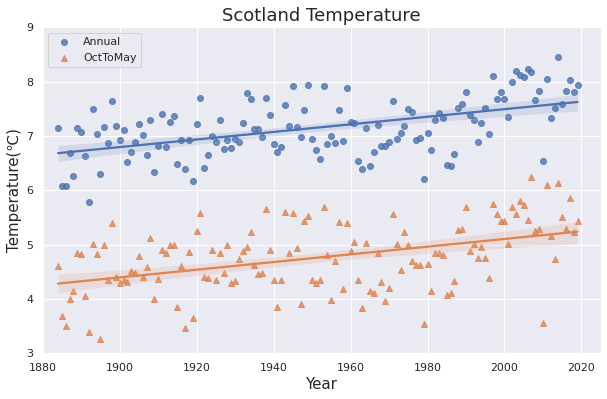

In [4]:
#Question 1: How the air temperature changed in Scotland from 1884 to 2019?
#Plot the data to prove it.
'''
Prototype
g = sns.lmplot(x='Year', y='Annual', data=sw, height=5, aspect=1.5)
g.set(title='Scotland Annual Temperature', ylabel='Temperature(℃)', xlim=(1880,2025), ylim=(5,9))
'''

fig, ax = plt.subplots(figsize=(10,6))

sns.regplot(x='Year', y='Annual', data=sw, label='Annual', marker='o', ax=ax)
sns.regplot(x='Year', y='OctToMay', data=sw, label='OctToMay', marker='^', ax=ax)
ax.set_title('Scotland Temperature', fontsize=18)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Temperature(℃)', fontsize=15)
ax.set_xlim(1880,2025)
ax.set_ylim(3,9)
ax.legend()
plt.show()

In [5]:
#Question 2: Did the change of the temperature influence the snow day percentage?

SSGB_st_Couligarton = pd.read_csv('DataForVisualisation/SSGB_st_Couligarton.txt', sep='|')

#separate date into year, month, day
SSGB_st_Couligarton['Year'] = SSGB_st_Couligarton['Date'].apply(lambda s: s[:4])
SSGB_st_Couligarton['Month'] = SSGB_st_Couligarton['Date'].apply(lambda s: s[5:7])
SSGB_st_Couligarton['Day'] = SSGB_st_Couligarton['Date'].apply(lambda s: s[8:])

#Most of the datasets focused on the snowline of winter(usually October to May)
#So I decide to get rid of the data in June and September.
SSGB_st_Couligarton = SSGB_st_Couligarton[(SSGB_st_Couligarton['Month'] != '06') & 
                                          (SSGB_st_Couligarton['Month'] != '09')]

#define each day did it snow based on the data of SnowlineElev Column
SSGB_st_Couligarton['SnowOrNot'] = SSGB_st_Couligarton['SnowlineElev'].apply(lambda x: 0 if (x == '99' or x == 'n') else 1)

#change data type
SSGB_st_Couligarton.loc[:,'Year'] = SSGB_st_Couligarton.loc[:,'Year'].astype('int64')

In [6]:
SSGB_st_Couligarton

Date      KeyName Snowline SnowlineElev  Year Month Day  \
0      1955-01-01  Couligarton       99           99  1955    01  01   
1      1955-01-02  Couligarton       99           99  1955    01  02   
2      1955-01-03  Couligarton       99           99  1955    01  03   
3      1955-01-04  Couligarton      900          900  1955    01  04   
4      1955-01-05  Couligarton      900          900  1955    01  05   
...           ...          ...      ...          ...   ...   ...  ..   
11840  2007-05-27  Couligarton        n            n  2007    05  27   
11841  2007-05-28  Couligarton        n            n  2007    05  28   
11842  2007-05-29  Couligarton        n            n  2007    05  29   
11843  2007-05-30  Couligarton        n            n  2007    05  30   
11844  2007-05-31  Couligarton        n            n  2007    05  31   

       SnowOrNot  
0              0  
1              0  
2              0  
3              1  
4              1  
...          ...  
11840          0  
11841          0  
11842          0  
11843          0  
11844          0  

[11665 rows x 8 columns]

In [7]:
st_cou_snowDays = SSGB_st_Couligarton.groupby('Year')['SnowOrNot'].sum()
st_cou_total = SSGB_st_Couligarton.groupby('Year')['SnowOrNot'].count()
st_cou_notSnowDays = st_cou_total - st_cou_snowDays
st_cou_sPct = st_cou_snowDays / st_cou_total * 100
st_cou_nSPct = st_cou_notSnowDays / st_cou_total * 100

df_stCouSnow = pd.DataFrame({'Year': SSGB_st_Couligarton['Year'].unique().astype('int'),
                            'snowDays': st_cou_snowDays,
                            'notSnowDays': st_cou_notSnowDays,
                            'sPct': st_cou_sPct,
                            'nSPct': st_cou_nSPct,                             
                            'index': np.arange(len(st_cou_snowDays))}).set_index('index')

In [8]:
df_stCouSnow.head()

Year  snowDays  notSnowDays       sPct      nSPct
index                                                   
0      1955       115          128  47.325103  52.674897
1      1956        64          149  30.046948  69.953052
2      1957        45          168  21.126761  78.873239
3      1958        59          153  27.830189  72.169811
4      1959        66          177  27.160494  72.839506

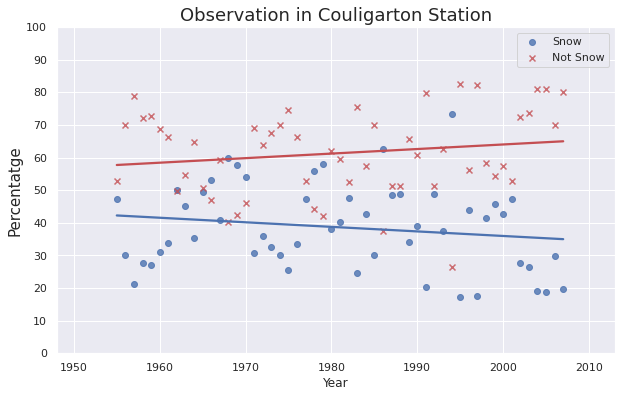

In [9]:
fig, ax = plt.subplots(figsize=(10,6))

sns.regplot(df_stCouSnow['Year'], y=df_stCouSnow['sPct'], ci=None, label='Snow', marker='o', color='b', ax=ax)
sns.regplot(df_stCouSnow['Year'], y=df_stCouSnow['nSPct'], ci=None, label='Not Snow', marker='x', color='r', ax=ax)
ax.set_title('Observation in Couligarton Station', fontsize=18)
ax.set_ylabel('Year',fontsize=15)
ax.set_ylabel('Percentatge',fontsize=15)
ax.set_xlim(1948,2013)
ax.set_ylim(0,100)
ax.set_yticks(np.arange(0,101,10))
ax.legend()
plt.show()

In [10]:
#Question 3: Whether the snowline was higher or not?

df_stCouSnowLine = SSGB_st_Couligarton[(SSGB_st_Couligarton['SnowlineElev'] != '99')
                                      &(SSGB_st_Couligarton['SnowlineElev'] != 'n')]
df_stCouSnowLine.loc[:,'SnowlineElev'] = df_stCouSnowLine.loc[:,'SnowlineElev'].astype('int64')
df_stCouSnowLine.loc[:,'Year'] = df_stCouSnowLine.loc[:,'Year'].astype('int64')

/home/c1937813/.local/share/virtualenvs/MyPythonModule-ykqmbHrW/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


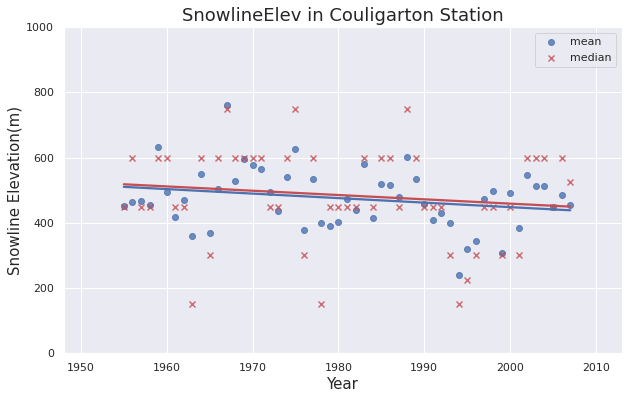

In [11]:
'''
#Prototype
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x='Year', y='SnowlineElev', data=df_stCouSnowLine, ax=ax)
ax.set_ylim(0,1200)
plt.show()
'''

x = df_stCouSnowLine.groupby('Year')['SnowlineElev'].describe().index
y1 = df_stCouSnowLine.groupby('Year')['SnowlineElev'].describe()['mean']
y2 = df_stCouSnowLine.groupby('Year')['SnowlineElev'].describe()['50%']

fig, ax = plt.subplots(figsize=(10,6), sharey=True)
sns.regplot(x, y=y1, ci=None, label='mean', marker='o', color='b', ax=ax)
sns.regplot(x, y=y2, ci=None, label='median', marker='x', color='r', ax=ax)
ax.set_title('SnowlineElev in Couligarton Station', fontsize=18)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Snowline Elevation(m)', fontsize=15)
ax.set_xlim(1948,2013)
ax.set_ylim(0,1000)
ax.legend()
plt.show()

In [12]:
#Question 4: Is there a correlation between temperature and snowline data?

p1 = sw[(sw['Year']>=1955) & (sw['Year']<=2007)].reset_index()['Year']
p2 = sw[(sw['Year']>=1955) & (sw['Year']<=2007)].reset_index()['OctToMay']
p3 = df_stCouSnowLine.groupby('Year')['SnowlineElev'].describe().reset_index()['mean']
p4 = df_stCouSnowLine.groupby('Year')['SnowlineElev'].describe().reset_index()['50%']
p5 = df_stCouSnow['sPct']
df_TempSnowline = pd.DataFrame({'Year': p1, 'Temperature': p2, 'snowline_mean': p3, 'snowline_median': p4, 'snowdaypct': p5})

In [13]:
df_TempSnowline.head()

Year  Temperature  snowline_mean  snowline_median  snowdaypct
0  1955         3.98     452.608696            450.0   47.325103
1  1956         4.69     464.062500            600.0   30.046948
2  1957         5.41     466.666667            450.0   21.126761
3  1958         4.18     455.084746            450.0   27.830189
4  1959         5.40     631.818182            600.0   27.160494

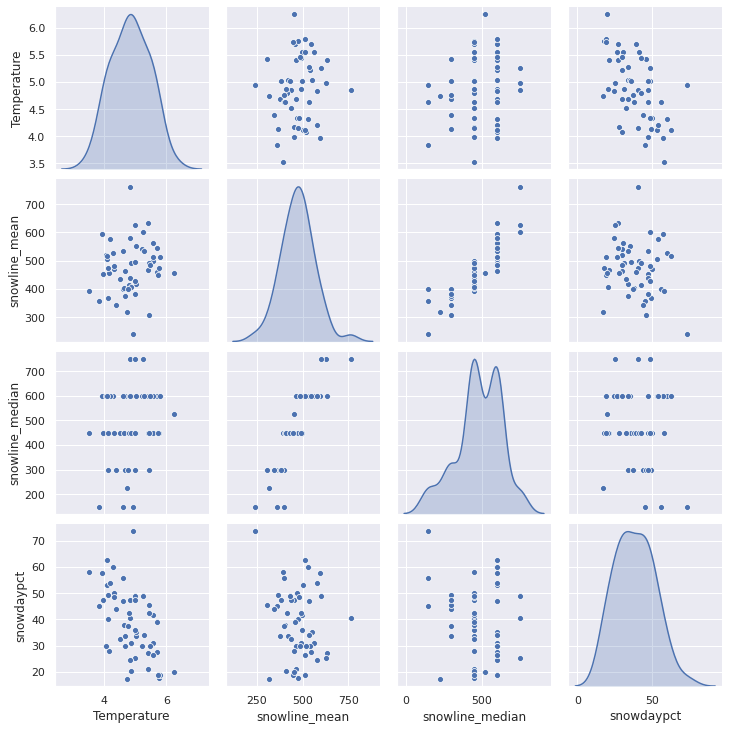

In [14]:
sns.pairplot(df_TempSnowline.loc[:,'Temperature':'snowdaypct'],diag_kind="kde")
plt.show()

In [15]:
#Use two more Stations' data to answer question 2-4 again

#Question 2: Did the change of the temperature influence the snow day percentage?
#With the data from ForrestLodge station

SSGB_st_ForrestLodge = pd.read_csv('DataForVisualisation/SSGB_st_ForrestLodge.txt', sep='|')

#separate date into year, month, day
SSGB_st_ForrestLodge['Year'] = SSGB_st_ForrestLodge['Date'].apply(lambda s: s[:4])
SSGB_st_ForrestLodge['Month'] = SSGB_st_ForrestLodge['Date'].apply(lambda s: s[5:7])
SSGB_st_ForrestLodge['Day'] = SSGB_st_ForrestLodge['Date'].apply(lambda s: s[8:])

#Most of the datasets focused on the snowline of winter(usually October to May)
#So I decide to get rid of the data in June and September.
SSGB_st_ForrestLodge = SSGB_st_ForrestLodge[(SSGB_st_ForrestLodge['Month'] != '06') & 
                                          (SSGB_st_ForrestLodge['Month'] != '09')]

#define each day did it snow based on the data of SnowlineElev Column
SSGB_st_ForrestLodge['SnowOrNot'] = SSGB_st_ForrestLodge['SnowlineElev'].apply(lambda x: 0 if (x == '99' or x == 'n') else 1)

#change data type
SSGB_st_ForrestLodge.loc[:,'Year'] = SSGB_st_ForrestLodge.loc[:,'Year'].astype('int64')

In [16]:
SSGB_st_ForrestLodge

Date       KeyName Snowline SnowlineElev  Year Month Day  \
30     1954-10-01  ForrestLodge        n            n  1954    10  01   
31     1954-10-02  ForrestLodge        n            n  1954    10  02   
32     1954-10-03  ForrestLodge        n            n  1954    10  03   
33     1954-10-04  ForrestLodge        n            n  1954    10  04   
34     1954-10-05  ForrestLodge        n            n  1954    10  05   
...           ...           ...      ...          ...   ...   ...  ..   
11634  2005-11-26  ForrestLodge      600          600  2005    11  26   
11635  2005-11-27  ForrestLodge      600          600  2005    11  27   
11636  2005-11-28  ForrestLodge      600          600  2005    11  28   
11637  2005-11-29  ForrestLodge        n            n  2005    11  29   
11638  2005-11-30  ForrestLodge        n            n  2005    11  30   

       SnowOrNot  
30             0  
31             0  
32             0  
33             0  
34             0  
...          ...  
11634          1  
11635          1  
11636          1  
11637          0  
11638          0  

[11429 rows x 8 columns]

In [17]:
st_for_snowDays = SSGB_st_ForrestLodge.groupby('Year')['SnowOrNot'].sum()
st_for_total = SSGB_st_ForrestLodge.groupby('Year')['SnowOrNot'].count()
st_for_notSnowDays = st_for_total - st_for_snowDays
st_for_sPct = st_for_snowDays / st_for_total * 100
st_for_nSPct = st_for_notSnowDays / st_for_total * 100

df_stForSnow = pd.DataFrame({'Year': SSGB_st_ForrestLodge['Year'].unique().astype('int'),
                            'snowDays': st_for_snowDays,
                            'notSnowDays': st_for_notSnowDays,
                            'sPct': st_for_sPct,
                            'nSPct': st_for_nSPct,                             
                            'index': np.arange(len(st_for_snowDays))}).set_index('index')

In [18]:
df_stForSnow.head()

Year  snowDays  notSnowDays       sPct      nSPct
index                                                   
0      1954        15           77  16.304348  83.695652
1      1955        82          161  33.744856  66.255144
2      1956        67          177  27.459016  72.540984
3      1957        47          196  19.341564  80.658436
4      1958        61          182  25.102881  74.897119

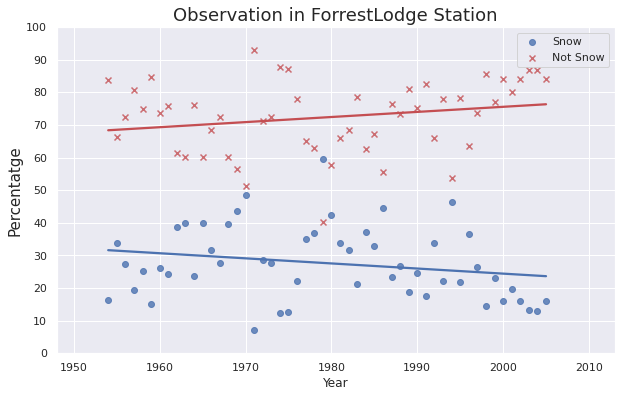

In [19]:
fig, ax = plt.subplots(figsize=(10,6))

sns.regplot(df_stForSnow['Year'], y=df_stForSnow['sPct'], ci=None, label='Snow', marker='o', color='b', ax=ax)
sns.regplot(df_stForSnow['Year'], y=df_stForSnow['nSPct'], ci=None, label='Not Snow', marker='x', color='r', ax=ax)
ax.set_title('Observation in ForrestLodge Station', fontsize=18)
ax.set_ylabel('Year',fontsize=15)
ax.set_ylabel('Percentatge',fontsize=15)
ax.set_xlim(1948,2013)
ax.set_ylim(0,100)
ax.set_yticks(np.arange(0,101,10))
ax.legend()
plt.show()

In [20]:
#Question 3: Whether the snowline was higher or not?
#With the data from ForrestLodge station

df_stForSnowLine = SSGB_st_ForrestLodge[(SSGB_st_ForrestLodge['SnowlineElev'] != '99')
                                      &(SSGB_st_ForrestLodge['SnowlineElev'] != 'n')]
df_stForSnowLine.loc[:,'SnowlineElev'] = df_stForSnowLine.loc[:,'SnowlineElev'].astype('int64')
df_stForSnowLine.loc[:,'Year'] = df_stForSnowLine.loc[:,'Year'].astype('int64')

/home/c1937813/.local/share/virtualenvs/MyPythonModule-ykqmbHrW/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


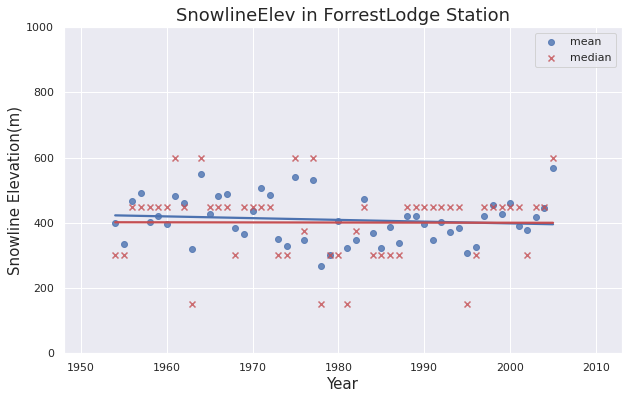

In [21]:
x2 = df_stForSnowLine.groupby('Year')['SnowlineElev'].describe().index
y2_1 = df_stForSnowLine.groupby('Year')['SnowlineElev'].describe()['mean']
y2_2 = df_stForSnowLine.groupby('Year')['SnowlineElev'].describe()['50%']

fig, ax = plt.subplots(figsize=(10,6), sharey=True)
sns.regplot(x2, y=y2_1, ci=None, label='mean', marker='o', color='b', ax=ax)
sns.regplot(x2, y=y2_2, ci=None, label='median', marker='x', color='r', ax=ax)
ax.set_title('SnowlineElev in ForrestLodge Station', fontsize=18)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Snowline Elevation(m)', fontsize=15)
ax.set_xlim(1948,2013)
ax.set_ylim(0,1000)
ax.legend()
plt.show()

In [22]:
#Question 4: Is there a correlation between temperature and snowline data?
#With the data from ForrestLodge station

p2_1 = sw[(sw['Year']>=1955) & (sw['Year']<=2007)].reset_index()['Year']
p2_2 = sw[(sw['Year']>=1955) & (sw['Year']<=2007)].reset_index()['OctToMay']
p2_3 = df_stForSnowLine.groupby('Year')['SnowlineElev'].describe().reset_index()['mean']
p2_4 = df_stForSnowLine.groupby('Year')['SnowlineElev'].describe().reset_index()['50%']
p2_5 = df_stForSnow['sPct']
df_stForTempSnowline = pd.DataFrame({'Year': p2_1, 'Temperature': p2_2, 'snowline_mean': p2_3, 'snowline_median': p2_4, 'snowdaypct': p2_5})

In [23]:
df_stForTempSnowline.head()

Year  Temperature  snowline_mean  snowline_median  snowdaypct
0  1955         3.98     400.000000            300.0   16.304348
1  1956         4.69     336.585366            300.0   33.744856
2  1957         5.41     467.910448            450.0   27.459016
3  1958         4.18     491.489362            450.0   19.341564
4  1959         5.40     403.278689            450.0   25.102881

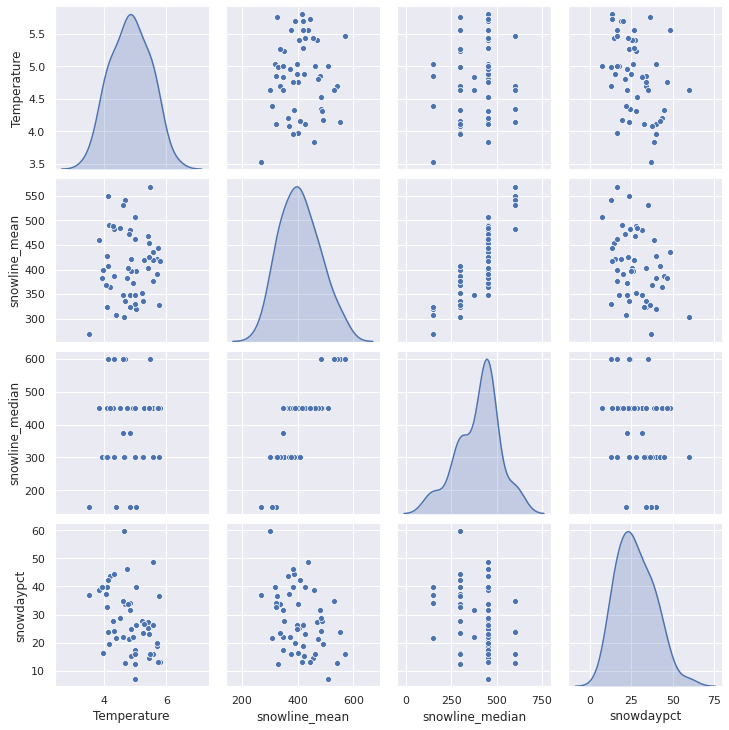

In [24]:
sns.pairplot(df_stForTempSnowline.loc[:,'Temperature':'snowdaypct'],diag_kind="kde")
plt.show()

In [25]:
#Question 2: Did the change of the temperature influence the snow day percentage?
#With the data from LochVennachar station

SSGB_st_LochVennachar = pd.read_csv('DataForVisualisation/SSGB_st_LochVennachar.txt', sep='|')

#separate date into year, month, day
SSGB_st_LochVennachar['Year'] = SSGB_st_LochVennachar['Date'].apply(lambda s: s[:4])
SSGB_st_LochVennachar['Month'] = SSGB_st_LochVennachar['Date'].apply(lambda s: s[5:7])
SSGB_st_LochVennachar['Day'] = SSGB_st_LochVennachar['Date'].apply(lambda s: s[8:])

#Most of the datasets focused on the snowline of winter(usually October to May)
#So I decide to get rid of the data in June and September.
SSGB_st_LochVennachar = SSGB_st_LochVennachar[(SSGB_st_LochVennachar['Month'] != '06') & 
                                          (SSGB_st_LochVennachar['Month'] != '09')]

#define each day did it snow based on the data of SnowlineElev Column
SSGB_st_LochVennachar['SnowOrNot'] = SSGB_st_LochVennachar['SnowlineElev'].apply(lambda x: 0 if (x == '99' or x == 'n') else 1)

#change data type
SSGB_st_LochVennachar.loc[:,'Year'] = SSGB_st_LochVennachar.loc[:,'Year'].astype('int64')

In [26]:
SSGB_st_LochVennachar

Date        KeyName Snowline SnowlineElev  Year Month Day  \
0      1954-12-01  LochVennachar        n            n  1954    12  01   
1      1954-12-02  LochVennachar        n            n  1954    12  02   
2      1954-12-03  LochVennachar        n            n  1954    12  03   
3      1954-12-04  LochVennachar        n            n  1954    12  04   
4      1954-12-05  LochVennachar        n            n  1954    12  05   
...           ...            ...      ...          ...   ...   ...  ..   
11143  2004-11-26  LochVennachar        n            n  2004    11  26   
11144  2004-11-27  LochVennachar        n            n  2004    11  27   
11145  2004-11-28  LochVennachar        n            n  2004    11  28   
11146  2004-11-29  LochVennachar        n            n  2004    11  29   
11147  2004-11-30  LochVennachar        n            n  2004    11  30   

       SnowOrNot  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
11143          0  
11144          0  
11145          0  
11146          0  
11147          0  

[10998 rows x 8 columns]

In [27]:
st_loc_snowDays = SSGB_st_LochVennachar.groupby('Year')['SnowOrNot'].sum()
st_loc_total = SSGB_st_LochVennachar.groupby('Year')['SnowOrNot'].count()
st_loc_notSnowDays = st_loc_total - st_loc_snowDays
st_loc_sPct = st_loc_snowDays / st_loc_total * 100
st_loc_nSPct = st_loc_notSnowDays / st_loc_total * 100

df_stLocSnow = pd.DataFrame({'Year': SSGB_st_LochVennachar['Year'].unique().astype('int'),
                            'snowDays': st_loc_snowDays,
                            'notSnowDays': st_loc_notSnowDays,
                            'sPct': st_loc_sPct,
                            'nSPct': st_loc_nSPct,                             
                            'index': np.arange(len(st_loc_snowDays))}).set_index('index')

In [28]:
df_stLocSnow.head()

Year  snowDays  notSnowDays       sPct      nSPct
index                                                   
0      1954         4           27  12.903226  87.096774
1      1955        93          150  38.271605  61.728395
2      1956        87          126  40.845070  59.154930
3      1957        62          151  29.107981  70.892019
4      1958        68          175  27.983539  72.016461

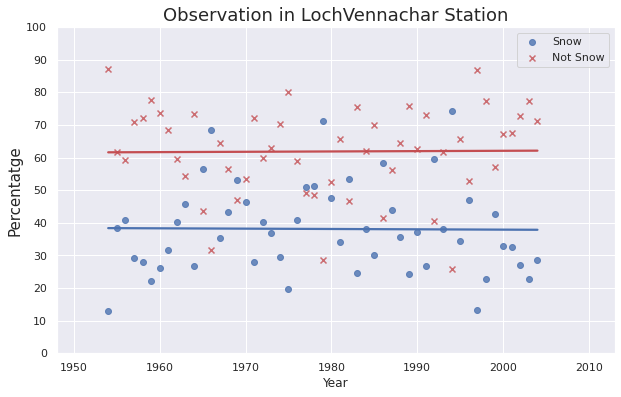

In [29]:
fig, ax = plt.subplots(figsize=(10,6))

sns.regplot(df_stLocSnow['Year'], y=df_stLocSnow['sPct'], ci=None, label='Snow', marker='o', color='b', ax=ax)
sns.regplot(df_stLocSnow['Year'], y=df_stLocSnow['nSPct'], ci=None, label='Not Snow', marker='x', color='r', ax=ax)
ax.set_title('Observation in LochVennachar Station', fontsize=18)
ax.set_ylabel('Year',fontsize=15)
ax.set_ylabel('Percentatge',fontsize=15)
ax.set_xlim(1948,2013)
ax.set_ylim(0,100)
ax.set_yticks(np.arange(0,101,10))
ax.legend()
plt.show()

In [30]:
#Question 3: Whether the snowline was higher or not?
#With the data from LochVennachar station

df_stLocSnowLine = SSGB_st_LochVennachar[(SSGB_st_LochVennachar['SnowlineElev'] != '99')
                                      &(SSGB_st_LochVennachar['SnowlineElev'] != 'n')]
df_stLocSnowLine.loc[:,'SnowlineElev'] = df_stLocSnowLine.loc[:,'SnowlineElev'].astype('int64')
df_stLocSnowLine.loc[:,'Year'] = df_stLocSnowLine.loc[:,'Year'].astype('int64')

/home/c1937813/.local/share/virtualenvs/MyPythonModule-ykqmbHrW/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


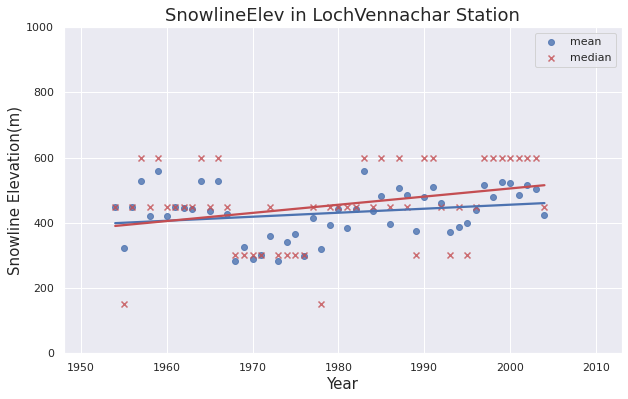

In [31]:
x3 = df_stLocSnowLine.groupby('Year')['SnowlineElev'].describe().index
y3_1 = df_stLocSnowLine.groupby('Year')['SnowlineElev'].describe()['mean']
y3_2 = df_stLocSnowLine.groupby('Year')['SnowlineElev'].describe()['50%']

fig, ax = plt.subplots(figsize=(10,6), sharey=True)
sns.regplot(x3, y=y3_1, ci=None, label='mean', marker='o', color='b', ax=ax)
sns.regplot(x3, y=y3_2, ci=None, label='median', marker='x', color='r', ax=ax)
ax.set_title('SnowlineElev in LochVennachar Station', fontsize=18)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Snowline Elevation(m)', fontsize=15)
ax.set_xlim(1948,2013)
ax.set_ylim(0,1000)
ax.legend()
plt.show()

In [32]:
#Question 4: Is there a correlation between temperature and snowline data?
#With the data from LochVennachar station

p3_1 = sw[(sw['Year']>=1955) & (sw['Year']<=2007)].reset_index()['Year']
p3_2 = sw[(sw['Year']>=1955) & (sw['Year']<=2007)].reset_index()['OctToMay']
p3_3 = df_stLocSnowLine.groupby('Year')['SnowlineElev'].describe().reset_index()['mean']
p3_4 = df_stLocSnowLine.groupby('Year')['SnowlineElev'].describe().reset_index()['50%']
p3_5 = df_stLocSnow['sPct']
df_stLocTempSnowline = pd.DataFrame({'Year': p3_1, 'Temperature': p3_2, 'snowline_mean': p3_3, 'snowline_median': p3_4, 'snowdaypct': p3_5})

In [33]:
df_stLocTempSnowline.head()

Year  Temperature  snowline_mean  snowline_median  snowdaypct
0  1955         3.98     450.000000            450.0   12.903226
1  1956         4.69     322.580645            150.0   38.271605
2  1957         5.41     450.000000            450.0   40.845070
3  1958         4.18     527.419355            600.0   29.107981
4  1959         5.40     421.323529            450.0   27.983539

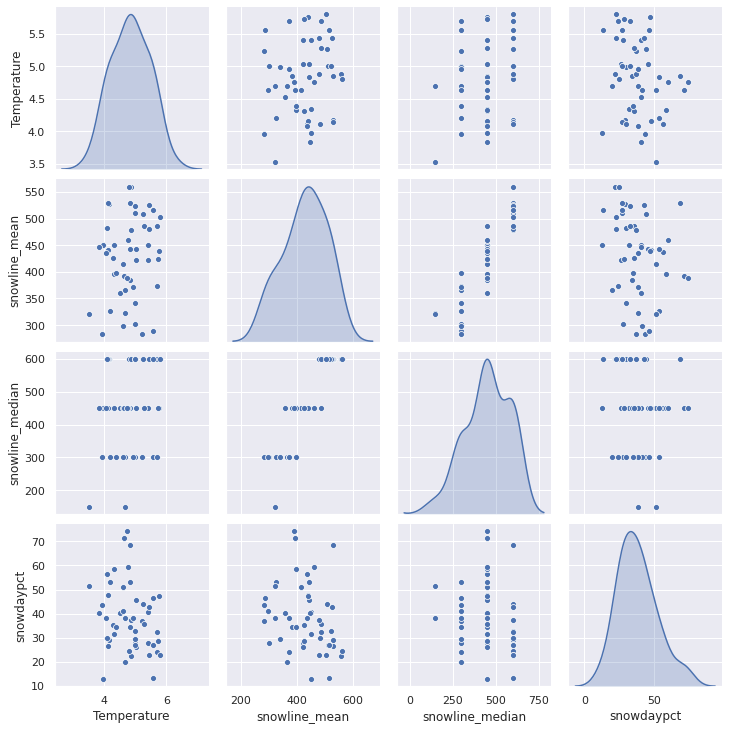

In [34]:
sns.pairplot(df_stLocTempSnowline.loc[:,'Temperature':'snowdaypct'],diag_kind="kde")
plt.show()

In [35]:
#Interactive Visualisation
#Load all 140 Stations' data

SSGB_st_Achentoul = pd.read_csv('DataForVisualisation/SSGB_st_Achentoul.txt', sep='|')
SSGB_st_Achfary = pd.read_csv('DataForVisualisation/SSGB_st_Achfary.txt', sep='|')
SSGB_st_Achnagoichan = pd.read_csv('DataForVisualisation/SSGB_st_Achnagoichan.txt', sep='|')
SSGB_st_Ardchullin = pd.read_csv('DataForVisualisation/SSGB_st_Ardchullin.txt', sep='|')
SSGB_st_Ardtalnaig = pd.read_csv('DataForVisualisation/SSGB_st_Ardtalnaig.txt', sep='|')
SSGB_st_Ardverikie = pd.read_csv('DataForVisualisation/SSGB_st_Ardverikie.txt', sep='|')
SSGB_st_AshintullyCastle = pd.read_csv('DataForVisualisation/SSGB_st_AshintullyCastle.txt', sep='|')
SSGB_st_Auchterhouse = pd.read_csv('DataForVisualisation/SSGB_st_Auchterhouse.txt', sep='|')
SSGB_st_Aviemore = pd.read_csv('DataForVisualisation/SSGB_st_Aviemore.txt', sep='|')
SSGB_st_BaddingsgillReservoir = pd.read_csv('DataForVisualisation/SSGB_st_BaddingsgillReservoir.txt', sep='|')
SSGB_st_BalhallLodge = pd.read_csv('DataForVisualisation/SSGB_st_BalhallLodge.txt', sep='|')
SSGB_st_Balquhidder = pd.read_csv('DataForVisualisation/SSGB_st_Balquhidder.txt', sep='|')
SSGB_st_Banavie = pd.read_csv('DataForVisualisation/SSGB_st_Banavie.txt', sep='|')
SSGB_st_Bargrennan = pd.read_csv('DataForVisualisation/SSGB_st_Bargrennan.txt', sep='|')
SSGB_st_Barra = pd.read_csv('DataForVisualisation/SSGB_st_Barra.txt', sep='|')
SSGB_st_BlackBridge = pd.read_csv('DataForVisualisation/SSGB_st_BlackBridge.txt', sep='|')
SSGB_st_BlairCastleGardens = pd.read_csv('DataForVisualisation/SSGB_st_BlairCastleGardens.txt', sep='|')
SSGB_st_Blaircreich = pd.read_csv('DataForVisualisation/SSGB_st_Blaircreich.txt', sep='|')
SSGB_st_Blinkbonny = pd.read_csv('DataForVisualisation/SSGB_st_Blinkbonny.txt', sep='|')
SSGB_st_BraemoreLodge = pd.read_csv('DataForVisualisation/SSGB_st_BraemoreLodge.txt', sep='|')
SSGB_st_BrigOTurk = pd.read_csv('DataForVisualisation/SSGB_st_BrigOTurk.txt', sep='|')
SSGB_st_Broadford = pd.read_csv('DataForVisualisation/SSGB_st_Broadford.txt', sep='|')
SSGB_st_Carbost = pd.read_csv('DataForVisualisation/SSGB_st_Carbost.txt', sep='|')
SSGB_st_CassleyPS = pd.read_csv('DataForVisualisation/SSGB_st_CassleyPS.txt', sep='|')
SSGB_st_ClachanPS = pd.read_csv('DataForVisualisation/SSGB_st_ClachanPS.txt', sep='|')
SSGB_st_CluanieDam = pd.read_csv('DataForVisualisation/SSGB_st_CluanieDam.txt', sep='|')
SSGB_st_Colonsay = pd.read_csv('DataForVisualisation/SSGB_st_Colonsay.txt', sep='|')
SSGB_st_Corpach = pd.read_csv('DataForVisualisation/SSGB_st_Corpach.txt', sep='|')
SSGB_st_Couligarton = pd.read_csv('DataForVisualisation/SSGB_st_Couligarton.txt', sep='|')
SSGB_st_CraigAchnashellach = pd.read_csv('DataForVisualisation/SSGB_st_CraigAchnashellach.txt', sep='|')
SSGB_st_Cramond = pd.read_csv('DataForVisualisation/SSGB_st_Cramond.txt', sep='|')
SSGB_st_Crathes = pd.read_csv('DataForVisualisation/SSGB_st_Crathes.txt', sep='|')
SSGB_st_Dalness = pd.read_csv('DataForVisualisation/SSGB_st_Dalness.txt', sep='|')
SSGB_st_Dalwhinnie = pd.read_csv('DataForVisualisation/SSGB_st_Dalwhinnie.txt', sep='|')
SSGB_st_DeaniePS = pd.read_csv('DataForVisualisation/SSGB_st_DeaniePS.txt', sep='|')
SSGB_st_Delnabo = pd.read_csv('DataForVisualisation/SSGB_st_Delnabo.txt', sep='|')
SSGB_st_DerryLodge = pd.read_csv('DataForVisualisation/SSGB_st_DerryLodge.txt', sep='|')
SSGB_st_Dinnet = pd.read_csv('DataForVisualisation/SSGB_st_Dinnet.txt', sep='|')
SSGB_st_Drumlanrig = pd.read_csv('DataForVisualisation/SSGB_st_Drumlanrig.txt', sep='|')
SSGB_st_Drummarns = pd.read_csv('DataForVisualisation/SSGB_st_Drummarns.txt', sep='|')
SSGB_st_DrummondCastle = pd.read_csv('DataForVisualisation/SSGB_st_DrummondCastle.txt', sep='|')
SSGB_st_Drummuir = pd.read_csv('DataForVisualisation/SSGB_st_Drummuir.txt', sep='|')
SSGB_st_Dykecrofts = pd.read_csv('DataForVisualisation/SSGB_st_Dykecrofts.txt', sep='|')
SSGB_st_Eallabus = pd.read_csv('DataForVisualisation/SSGB_st_Eallabus.txt', sep='|')
SSGB_st_Elphin = pd.read_csv('DataForVisualisation/SSGB_st_Elphin.txt', sep='|')
SSGB_st_Eskdalemuir = pd.read_csv('DataForVisualisation/SSGB_st_Eskdalemuir.txt', sep='|')
SSGB_st_Fairburn = pd.read_csv('DataForVisualisation/SSGB_st_Fairburn.txt', sep='|')
SSGB_st_Fairmilehead = pd.read_csv('DataForVisualisation/SSGB_st_Fairmilehead.txt', sep='|')
SSGB_st_FannichHills = pd.read_csv('DataForVisualisation/SSGB_st_FannichHills.txt', sep='|')
SSGB_st_Fersit = pd.read_csv('DataForVisualisation/SSGB_st_Fersit.txt', sep='|')
SSGB_st_Fetternear = pd.read_csv('DataForVisualisation/SSGB_st_Fetternear.txt', sep='|')
SSGB_st_ForrestLodge = pd.read_csv('DataForVisualisation/SSGB_st_ForrestLodge.txt', sep='|')
SSGB_st_FortAugustus = pd.read_csv('DataForVisualisation/SSGB_st_FortAugustus.txt', sep='|')
SSGB_st_FortWilliam = pd.read_csv('DataForVisualisation/SSGB_st_FortWilliam.txt', sep='|')
SSGB_st_Foyers = pd.read_csv('DataForVisualisation/SSGB_st_Foyers.txt', sep='|')
SSGB_st_FyvieCastle = pd.read_csv('DataForVisualisation/SSGB_st_FyvieCastle.txt', sep='|')
SSGB_st_Glackour = pd.read_csv('DataForVisualisation/SSGB_st_Glackour.txt', sep='|')
SSGB_st_Glenbrittle = pd.read_csv('DataForVisualisation/SSGB_st_Glenbrittle.txt', sep='|')
SSGB_st_GlenEsk = pd.read_csv('DataForVisualisation/SSGB_st_GlenEsk.txt', sep='|')
SSGB_st_Glenferness = pd.read_csv('DataForVisualisation/SSGB_st_Glenferness.txt', sep='|')
SSGB_st_Glengyle = pd.read_csv('DataForVisualisation/SSGB_st_Glengyle.txt', sep='|')
SSGB_st_GlenlatterachWTW = pd.read_csv('DataForVisualisation/SSGB_st_GlenlatterachWTW.txt', sep='|')
SSGB_st_Glenlivet = pd.read_csv('DataForVisualisation/SSGB_st_Glenlivet.txt', sep='|')
SSGB_st_Glenlyon = pd.read_csv('DataForVisualisation/SSGB_st_Glenlyon.txt', sep='|')
SSGB_st_GlenmoreLodge = pd.read_csv('DataForVisualisation/SSGB_st_GlenmoreLodge.txt', sep='|')
SSGB_st_GlenProsen = pd.read_csv('DataForVisualisation/SSGB_st_GlenProsen.txt', sep='|')
SSGB_st_Glenrossal = pd.read_csv('DataForVisualisation/SSGB_st_Glenrossal.txt', sep='|')
SSGB_st_GlensheeLodge = pd.read_csv('DataForVisualisation/SSGB_st_GlensheeLodge.txt', sep='|')
SSGB_st_GlensheroLodge = pd.read_csv('DataForVisualisation/SSGB_st_GlensheroLodge.txt', sep='|')
SSGB_st_HarperrigReservoir = pd.read_csv('DataForVisualisation/SSGB_st_HarperrigReservoir.txt', sep='|')
SSGB_st_HastonAirport = pd.read_csv('DataForVisualisation/SSGB_st_HastonAirport.txt', sep='|')
SSGB_st_HopesReservoir = pd.read_csv('DataForVisualisation/SSGB_st_HopesReservoir.txt', sep='|')
SSGB_st_HungrySnout = pd.read_csv('DataForVisualisation/SSGB_st_HungrySnout.txt', sep='|')
SSGB_st_InverawePS = pd.read_csv('DataForVisualisation/SSGB_st_InverawePS.txt', sep='|')
SSGB_st_Inverpolly = pd.read_csv('DataForVisualisation/SSGB_st_Inverpolly.txt', sep='|')
SSGB_st_Inverurie = pd.read_csv('DataForVisualisation/SSGB_st_Inverurie.txt', sep='|')
SSGB_st_Kinlochewe = pd.read_csv('DataForVisualisation/SSGB_st_Kinlochewe.txt', sep='|')
SSGB_st_KinlochRum = pd.read_csv('DataForVisualisation/SSGB_st_KinlochRum.txt', sep='|')
SSGB_st_Knockanrock = pd.read_csv('DataForVisualisation/SSGB_st_Knockanrock.txt', sep='|')
SSGB_st_KylesLodge = pd.read_csv('DataForVisualisation/SSGB_st_KylesLodge.txt', sep='|')
SSGB_st_Lanark = pd.read_csv('DataForVisualisation/SSGB_st_Lanark.txt', sep='|')
SSGB_st_Leadhills = pd.read_csv('DataForVisualisation/SSGB_st_Leadhills.txt', sep='|')
SSGB_st_Ledmore = pd.read_csv('DataForVisualisation/SSGB_st_Ledmore.txt', sep='|')
SSGB_st_LednockDam = pd.read_csv('DataForVisualisation/SSGB_st_LednockDam.txt', sep='|')
SSGB_st_Lerwick = pd.read_csv('DataForVisualisation/SSGB_st_Lerwick.txt', sep='|')
SSGB_st_LochArklet = pd.read_csv('DataForVisualisation/SSGB_st_LochArklet.txt', sep='|')
SSGB_st_LochCarron = pd.read_csv('DataForVisualisation/SSGB_st_LochCarron.txt', sep='|')
SSGB_st_LochGairPS = pd.read_csv('DataForVisualisation/SSGB_st_LochGairPS.txt', sep='|')
SSGB_st_LochLeven = pd.read_csv('DataForVisualisation/SSGB_st_LochLeven.txt', sep='|')
SSGB_st_LochRomach = pd.read_csv('DataForVisualisation/SSGB_st_LochRomach.txt', sep='|')
SSGB_st_LochSloy = pd.read_csv('DataForVisualisation/SSGB_st_LochSloy.txt', sep='|')
SSGB_st_LochVennachar = pd.read_csv('DataForVisualisation/SSGB_st_LochVennachar.txt', sep='|')
SSGB_st_Lochwinnoch = pd.read_csv('DataForVisualisation/SSGB_st_Lochwinnoch.txt', sep='|')
SSGB_st_LowtherHill = pd.read_csv('DataForVisualisation/SSGB_st_LowtherHill.txt', sep='|')
SSGB_st_Lubreoch = pd.read_csv('DataForVisualisation/SSGB_st_Lubreoch.txt', sep='|')
SSGB_st_Mauchline = pd.read_csv('DataForVisualisation/SSGB_st_Mauchline.txt', sep='|')
SSGB_st_MidArdross = pd.read_csv('DataForVisualisation/SSGB_st_MidArdross.txt', sep='|')
SSGB_st_Milnathort = pd.read_csv('DataForVisualisation/SSGB_st_Milnathort.txt', sep='|')
SSGB_st_Morar = pd.read_csv('DataForVisualisation/SSGB_st_Morar.txt', sep='|')
SSGB_st_MuirofOrd = pd.read_csv('DataForVisualisation/SSGB_st_MuirofOrd.txt', sep='|')
SSGB_st_Mullardoch = pd.read_csv('DataForVisualisation/SSGB_st_Mullardoch.txt', sep='|')
SSGB_st_Muthill = pd.read_csv('DataForVisualisation/SSGB_st_Muthill.txt', sep='|')
SSGB_st_NATOFSSCollafirthHill = pd.read_csv('DataForVisualisation/SSGB_st_NATOFSSCollafirthHill.txt', sep='|')
SSGB_st_NATOFSSMossyHill = pd.read_csv('DataForVisualisation/SSGB_st_NATOFSSMossyHill.txt', sep='|')
SSGB_st_Nedd = pd.read_csv('DataForVisualisation/SSGB_st_Nedd.txt', sep='|')
SSGB_st_Newcastleton = pd.read_csv('DataForVisualisation/SSGB_st_Newcastleton.txt', sep='|')
SSGB_st_Newton = pd.read_csv('DataForVisualisation/SSGB_st_Newton.txt', sep='|')
SSGB_st_OrrinDam = pd.read_csv('DataForVisualisation/SSGB_st_OrrinDam.txt', sep='|')
SSGB_st_Peebles = pd.read_csv('DataForVisualisation/SSGB_st_Peebles.txt', sep='|')
SSGB_st_Pennyghael = pd.read_csv('DataForVisualisation/SSGB_st_Pennyghael.txt', sep='|')
SSGB_st_Polloch = pd.read_csv('DataForVisualisation/SSGB_st_Polloch.txt', sep='|')
SSGB_st_PortmoreReservoir = pd.read_csv('DataForVisualisation/SSGB_st_PortmoreReservoir.txt', sep='|')
SSGB_st_Prabost = pd.read_csv('DataForVisualisation/SSGB_st_Prabost.txt', sep='|')
SSGB_st_Prestwick = pd.read_csv('DataForVisualisation/SSGB_st_Prestwick.txt', sep='|')
SSGB_st_QuoichPS = pd.read_csv('DataForVisualisation/SSGB_st_QuoichPS.txt', sep='|')
SSGB_st_RannochPS = pd.read_csv('DataForVisualisation/SSGB_st_RannochPS.txt', sep='|')
SSGB_st_Ratagan = pd.read_csv('DataForVisualisation/SSGB_st_Ratagan.txt', sep='|')
SSGB_st_RochehieFS = pd.read_csv('DataForVisualisation/SSGB_st_RochehieFS.txt', sep='|')
SSGB_st_RoyBridge = pd.read_csv('DataForVisualisation/SSGB_st_RoyBridge.txt', sep='|')
SSGB_st_RuvaalLighthouse = pd.read_csv('DataForVisualisation/SSGB_st_RuvaalLighthouse.txt', sep='|')
SSGB_st_Sligachan = pd.read_csv('DataForVisualisation/SSGB_st_Sligachan.txt', sep='|')
SSGB_st_Sourhope = pd.read_csv('DataForVisualisation/SSGB_st_Sourhope.txt', sep='|')
SSGB_st_SouthMoorhouse = pd.read_csv('DataForVisualisation/SSGB_st_SouthMoorhouse.txt', sep='|')
SSGB_st_StAndrews = pd.read_csv('DataForVisualisation/SSGB_st_StAndrews.txt', sep='|')
SSGB_st_StanhopeFarm = pd.read_csv('DataForVisualisation/SSGB_st_StanhopeFarm.txt', sep='|')
SSGB_st_Stenness = pd.read_csv('DataForVisualisation/SSGB_st_Stenness.txt', sep='|')
SSGB_st_StirlingUniversity = pd.read_csv('DataForVisualisation/SSGB_st_StirlingUniversity.txt', sep='|')
SSGB_st_Strachan = pd.read_csv('DataForVisualisation/SSGB_st_Strachan.txt', sep='|')
SSGB_st_Strathconan = pd.read_csv('DataForVisualisation/SSGB_st_Strathconan.txt', sep='|')
SSGB_st_Stromeferry = pd.read_csv('DataForVisualisation/SSGB_st_Stromeferry.txt', sep='|')
SSGB_st_Stronachlachar = pd.read_csv('DataForVisualisation/SSGB_st_Stronachlachar.txt', sep='|')
SSGB_st_Tannadice = pd.read_csv('DataForVisualisation/SSGB_st_Tannadice.txt', sep='|')
SSGB_st_Taynuilt = pd.read_csv('DataForVisualisation/SSGB_st_Taynuilt.txt', sep='|')
SSGB_st_Tomachaoruinn = pd.read_csv('DataForVisualisation/SSGB_st_Tomachaoruinn.txt', sep='|')
SSGB_st_Uplawmoor = pd.read_csv('DataForVisualisation/SSGB_st_Uplawmoor.txt', sep='|')
SSGB_st_UppatBrora = pd.read_csv('DataForVisualisation/SSGB_st_UppatBrora.txt', sep='|')
SSGB_st_Vementry = pd.read_csv('DataForVisualisation/SSGB_st_Vementry.txt', sep='|')
SSGB_st_Whitchester = pd.read_csv('DataForVisualisation/SSGB_st_Whitchester.txt', sep='|')
SSGB_st_Whitehillocks = pd.read_csv('DataForVisualisation/SSGB_st_Whitehillocks.txt', sep='|')
SSGB_st_WindyHeadRadioStation = pd.read_csv('DataForVisualisation/SSGB_st_WindyHeadRadioStation.txt', sep='|')

In [36]:
#put the dfs' name into a list
stations = [SSGB_st_Achentoul,SSGB_st_Achfary,SSGB_st_Achnagoichan,SSGB_st_Ardchullin,
SSGB_st_Ardtalnaig,SSGB_st_Ardverikie,SSGB_st_AshintullyCastle,SSGB_st_Auchterhouse,
SSGB_st_Aviemore,SSGB_st_BaddingsgillReservoir,SSGB_st_BalhallLodge,SSGB_st_Balquhidder,SSGB_st_Banavie,
SSGB_st_Bargrennan,SSGB_st_Barra,SSGB_st_BlackBridge,SSGB_st_BlairCastleGardens,
SSGB_st_Blaircreich,SSGB_st_Blinkbonny,SSGB_st_BraemoreLodge,SSGB_st_BrigOTurk,
SSGB_st_Broadford,SSGB_st_Carbost,SSGB_st_CassleyPS,SSGB_st_ClachanPS,
SSGB_st_CluanieDam,SSGB_st_Colonsay,SSGB_st_Corpach,SSGB_st_Couligarton,
SSGB_st_CraigAchnashellach,SSGB_st_Cramond,SSGB_st_Crathes,SSGB_st_Dalness,
SSGB_st_Dalwhinnie,SSGB_st_DeaniePS,SSGB_st_Delnabo,SSGB_st_DerryLodge,
SSGB_st_Dinnet,SSGB_st_Drumlanrig,SSGB_st_Drummarns,SSGB_st_DrummondCastle,
SSGB_st_Drummuir,SSGB_st_Dykecrofts,SSGB_st_Eallabus,SSGB_st_Elphin,SSGB_st_Eskdalemuir,
SSGB_st_Fairburn,SSGB_st_Fairmilehead,SSGB_st_FannichHills,SSGB_st_Fersit,
SSGB_st_Fetternear,SSGB_st_ForrestLodge,SSGB_st_FortAugustus,SSGB_st_FortWilliam,
SSGB_st_Foyers,SSGB_st_FyvieCastle,SSGB_st_Glackour,SSGB_st_Glenbrittle,
SSGB_st_GlenEsk,SSGB_st_Glenferness,SSGB_st_Glengyle,SSGB_st_GlenlatterachWTW,
SSGB_st_Glenlivet,SSGB_st_Glenlyon,SSGB_st_GlenmoreLodge,SSGB_st_GlenProsen,
SSGB_st_Glenrossal,SSGB_st_GlensheeLodge,SSGB_st_GlensheroLodge,SSGB_st_HarperrigReservoir,
SSGB_st_HastonAirport,SSGB_st_HopesReservoir,SSGB_st_HungrySnout,SSGB_st_InverawePS,
SSGB_st_Inverpolly,SSGB_st_Inverurie,SSGB_st_Kinlochewe,SSGB_st_KinlochRum,
SSGB_st_Knockanrock,SSGB_st_KylesLodge,SSGB_st_Lanark,SSGB_st_Leadhills,
SSGB_st_Ledmore,SSGB_st_LednockDam,SSGB_st_Lerwick,SSGB_st_LochArklet,
SSGB_st_LochCarron,SSGB_st_LochGairPS,SSGB_st_LochLeven,SSGB_st_LochRomach,
SSGB_st_LochSloy,SSGB_st_LochVennachar,SSGB_st_Lochwinnoch,SSGB_st_LowtherHill,
SSGB_st_Lubreoch,SSGB_st_Mauchline,SSGB_st_MidArdross,SSGB_st_Milnathort,
SSGB_st_Morar,SSGB_st_MuirofOrd,SSGB_st_Mullardoch,SSGB_st_Muthill,SSGB_st_NATOFSSCollafirthHill,
SSGB_st_NATOFSSMossyHill,SSGB_st_Nedd,SSGB_st_Newcastleton,SSGB_st_Newton,
SSGB_st_OrrinDam,SSGB_st_Peebles,SSGB_st_Pennyghael,SSGB_st_Polloch,
SSGB_st_PortmoreReservoir,SSGB_st_Prabost,SSGB_st_Prestwick,SSGB_st_QuoichPS,
SSGB_st_RannochPS,SSGB_st_Ratagan,SSGB_st_RochehieFS,SSGB_st_RoyBridge,
SSGB_st_RuvaalLighthouse,SSGB_st_Sligachan,SSGB_st_Sourhope,SSGB_st_SouthMoorhouse,
SSGB_st_StAndrews,SSGB_st_StanhopeFarm,SSGB_st_Stenness,SSGB_st_StirlingUniversity,
SSGB_st_Strachan,SSGB_st_Strathconan,SSGB_st_Stromeferry,SSGB_st_Stronachlachar,
SSGB_st_Tannadice,SSGB_st_Taynuilt,SSGB_st_Tomachaoruinn,SSGB_st_Uplawmoor,
SSGB_st_UppatBrora,SSGB_st_Vementry,SSGB_st_Whitchester,SSGB_st_Whitehillocks,
SSGB_st_WindyHeadRadioStation]

In [37]:
#create a DataFrame containing all the stations' data.
df_wholedata = pd.DataFrame()
df_wholedata = df_wholedata.append(stations)

In [38]:
df_wholedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508453 entries, 0 to 153
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Date          508453 non-null  object
 1   KeyName       508453 non-null  object
 2   Snowline      508453 non-null  object
 3   SnowlineElev  508453 non-null  object
dtypes: object(4)
memory usage: 19.4+ MB


In [39]:
#cleaning the data

#separate date into year, month, day
df_wholedata['Year'] = df_wholedata['Date'].apply(lambda s: s[:4])
df_wholedata['Month'] = df_wholedata['Date'].apply(lambda s: s[5:7])
df_wholedata['Day'] = df_wholedata['Date'].apply(lambda s: s[8:])

#Most of the datasets focused on the snowline of winter(usually October to May)
#So I decide to get rid of the data from June to September.
df_wholedata = df_wholedata[(df_wholedata['Month'] != '06')
                           &(df_wholedata['Month'] != '07')
                           &(df_wholedata['Month'] != '08')
                           &(df_wholedata['Month'] != '09')]

#define each day did it snow based on the data of SnowlineElev Column
df_wholedata['SnowOrNot'] = df_wholedata['SnowlineElev'].apply(lambda x: 0 if (x == '99' or x == 'n') else 1)

#change data type
df_wholedata.loc[:,'Year'] = df_wholedata.loc[:,'Year'].astype('int64')

#sort the data by year
df_wholedata = df_wholedata.sort_values(by = 'Year', ascending = True)

In [40]:
df_wholedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496835 entries, 0 to 11843
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Date          496835 non-null  object
 1   KeyName       496835 non-null  object
 2   Snowline      496835 non-null  object
 3   SnowlineElev  496835 non-null  object
 4   Year          496835 non-null  int64 
 5   Month         496835 non-null  object
 6   Day           496835 non-null  object
 7   SnowOrNot     496835 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 34.1+ MB


In [41]:
# import plotly for the interactive visualisation

import datetime
import plotly.graph_objects as go
import plotly.express as px
from ipywidgets import widgets

In [42]:
#visualise the record number of each year

'''
Prototype

fig, ax = plt.subplots(figsize=(20,6))
sns.countplot(x='Year', data=df_wholedata, ax=ax)
ax.set_xticklabels(df_wholedata['Year'].unique(), rotation=45)
plt.show()
'''


df_recordnumber = pd.DataFrame({'Record_num': df_wholedata.groupby('Year').count()['Date']}).reset_index()

fig = px.bar(df_recordnumber, x='Year', y='Record_num',
             title='The Record Number of Each Year')
fig.show()

In [43]:
#display the how many days are snow day and how many are no snow day

wholedata_snowDays = df_wholedata.groupby('Year')['SnowOrNot'].sum()
wholedata_totalDays = df_wholedata.groupby('Year')['SnowOrNot'].count()
wholedata_noSnowDays = wholedata_totalDays - wholedata_snowDays
wholedata_sPct = wholedata_snowDays / wholedata_totalDays * 100
wholedata_nSPct = wholedata_noSnowDays / wholedata_totalDays * 100

df_wholedataSnowRecord = pd.DataFrame({'Year': df_wholedata['Year'].unique(),
                                       'snowDays': wholedata_snowDays,
                                       'noSnowDays': wholedata_noSnowDays,
                                       'sPct': wholedata_sPct,
                                       'nSPct': wholedata_nSPct,
                                       'index': np.arange(len(wholedata_snowDays))}).set_index('index')

In [44]:
#use grouped barchart to show the number of snow days and no snow days from 1946 to 2007

fig = go.Figure(data=[
    go.Bar(name='Snow Days', x=df_wholedataSnowRecord['Year'], y=df_wholedataSnowRecord['snowDays']),
    go.Bar(name='No Snow Days', x=df_wholedataSnowRecord['Year'], y=df_wholedataSnowRecord['noSnowDays'])
])

fig.update_layout(barmode='group')
fig.show()

In [45]:
#use stacked barchart to show the number of snow days and no snow days from 1946 to 2007

fig = go.Figure(data=[
    go.Bar(name='Snow Percentage', x=df_wholedataSnowRecord['Year'], y=df_wholedataSnowRecord['sPct']),
    go.Bar(name='No Snow Percentage', x=df_wholedataSnowRecord['Year'], y=df_wholedataSnowRecord['nSPct'])
])

fig.update_layout(barmode='stack')
fig.show()

In [46]:
#use scatter plot to show the relationship
#between snow day percentage (or no snow day percentage) and mean temperature of June to September

df_snowtemprelationship = pd.merge(df_wholedataSnowRecord.set_index('Year'), sw.set_index('Year')['OctToMay'], how='left', on='Year')


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_snowtemprelationship['OctToMay'], y=df_snowtemprelationship['sPct'],
    name='Snow Day Persentage',
    mode='markers',
))

fig.add_trace(go.Scatter(
    x=df_snowtemprelationship['OctToMay'], y=df_snowtemprelationship['nSPct'],
    name='No Snow Day Persentage',
    mode='markers',
    marker_symbol = 'x',
    text=df_snowtemprelationship.index
))

fig.show()

In [47]:
#focus on the data with the snowing day

df_wholedataSnowLine = df_wholedata[(df_wholedata['SnowlineElev'] != '99')
                                   &(df_wholedata['SnowlineElev'] != 'n')]
df_wholedataSnowLine.loc[:,'SnowlineElev'] = df_wholedataSnowLine.loc[:,'SnowlineElev'].astype('int64')

/home/c1937813/.local/share/virtualenvs/MyPythonModule-ykqmbHrW/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
# create a list of all the stations' name
kyname = list(df_wholedataSnowLine['KeyName'].unique())
# in order to sort the stations' name
kyname.sort()
# add a new option -- 'All_Station' -- to show 
# all the Scotland Snowline Elevation
kyname.insert(0,'All_Station')

In [49]:
#Assign the widgets

year = widgets.IntSlider(
    value = 1946,
    min = 1946,
    max = 2007,
    step = 1,
    description = 'Year:',
    continuous_update = True
)

use_date = widgets.Checkbox(
    description='Date: ',
    value = False
)

container = widgets.HBox(children=[use_date, year])


stname = widgets.Dropdown(
    description = 'Station:   ',
    value = 'All_Station',
    options = kyname
)


# Assign an empty figure widget with two traces
trace1 = go.Histogram(x = df_wholedataSnowLine['SnowlineElev'], opacity = 0.75,
                      xbins=dict(
                          start=0,
                          end=1350,
                          size=150
                      ))
g = go.FigureWidget(data = [trace1],
                    layout = go.Layout(
                        title = dict(
                            text = 'Scotland Snowline Visualisation (Histogram)'
                        ),
                        xaxis = dict(
                            tickmode = 'linear',
                            tick0 = 0,
                            dtick = 150,
                            title = 'Snowline Elevation in Meters',
                        ),
                        yaxis = dict(
                            title = 'Number of Snowline Elevation',
                        )
                    ))


#write a function that will handle the input from the widgets, and alter the state of the graph.

def validate():
    if stname.value in kyname:
        return True
    else:
        return False
    
def response(change):
    if validate():
        #Not Choose All_Station
        if stname.value != 'All_Station':
            if use_date.value:
                filter_list = [i and j for i, j in
                               zip(df_wholedataSnowLine['Year'] == year.value,
                                   df_wholedataSnowLine['KeyName'] == stname.value)]
                temp_df = df_wholedataSnowLine[filter_list]

            else:
                filter_list = [i for i in
                               df_wholedataSnowLine['KeyName'] == stname.value]
                temp_df = df_wholedataSnowLine[filter_list]
            x1 = temp_df['SnowlineElev']
            with g.batch_update():
                g.data[0].x = x1
                g.layout.barmode = 'overlay'
                g.layout.xaxis.title = 'Snowline Elevation in Meters'
                g.layout.yaxis.title = 'Number of Snowline Elevation'
       
        #Choose All_Station
        else:
            if use_date.value:
                filter_list = [i for i in
                               df_wholedataSnowLine['Year'] == year.value]
                temp_df = df_wholedataSnowLine[filter_list]
            
            else:
                temp_df = df_wholedataSnowLine
            x1 = temp_df['SnowlineElev']
            with g.batch_update():
                g.data[0].x = x1
                g.layout.barmode = 'overlay'
                g.layout.xaxis.title = 'Snowline Elevation in Meters'
                g.layout.yaxis.title = 'Number of Snowline Elevation'
            
stname.observe(response, names = 'value')
year.observe(response, names = 'value')
use_date.observe(response, names = 'value')


#Generate the interactive histogram
container2 = widgets.HBox([stname])
widgets.VBox([container,
              container2,
              g])